# <span style="color: #FF9843">**EDA**</span>

## <span style="color: #FFDD95">**Exploración**</span>

### <span style="color: #8DECB4">**1-Importar Librerias y Datos**</span>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson
import numpy as np


Importamos el archivo con la información que necesitamos. Cabe recordar que este archivo ya está con la información limpia y lista para el análisis EDA:

In [2]:
# Definir la ruta relativa al archivo CSV
csv_path = '../2_ETL/viales_clean.csv'

# Cargar el archivo CSV en un DataFrame de pandas
df_viales = pd.read_csv(csv_path)

# Mostrar las primeras filas del DataFrame para verificar que se ha cargado correctamente
df_viales.columns

Index(['ID', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO', 'N_VICTIMAS',
       'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH', 'LUGAR_DEL_HECHO',
       'TIPO_DE_CALLE', 'CALLE', 'CRUCE', 'DIRECCIÓN_NORMALIZADA', 'COMUNA',
       'XY_(CABA)', 'POS_X', 'POS_Y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO',
       'Semestre'],
      dtype='object')

### <span style="color: #8DECB4">**2-Variables Categóricas**</span>

En el Análisis Exploratorio de Datos (EDA), las variables categóricas y numéricas juegan roles distintos pero complementarios para comprender la naturaleza del conjunto de datos y generar hipótesis relevantes para el análisis posterior.

**`Variables categóricas:`**

Definición: 
    Representan atributos cualitativos que se clasifican en categorías no numéricas. Algunos ejemplos comunes incluyen: género, tipo de producto, estado civil, etc.

_**Rol en el EDA:**_

- **Descripción de la distribución:** Se utilizan para identificar la frecuencia de cada categoría y resumir la distribución general de la variable. Esto se puede lograr mediante tablas de frecuencias, gráficos de barras o histogramas de frecuencias.

- **Análisis de relaciones:** Se exploran las relaciones entre las variables categóricas y otras variables (tanto categóricas como numéricas) mediante tablas de contingencia, gráficos de barras apilados o gráficos de mosaico.

- **Identificación de patrones:** Se buscan patrones y tendencias en la distribución de las variables categóricas, lo que puede revelar información valiosa sobre el comportamiento de los datos.

- En este trabajo podríamos generar relaciones entre el número de víctimas según rol del conductor. 

- Número de victimas según tipo de vehículo.

- Víctimas fatales según vhículos y lugares.

y así generar vários tipos de análisis y correlaciones.

    "ROL" posee 5 tipos de participación en los accidentes: CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'SD' y 'CICLISTA'.

In [3]:
df_viales["ROL"].unique()

array(['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'SD', 'CICLISTA'],
      dtype=object)

    El "SEXO" sólo puede ser 'MASCULINO', 'FEMENINO' o 'SD'.

In [4]:
df_viales["SEXO"].unique()

array(['MASCULINO', 'FEMENINO', 'SD'], dtype=object)

    El "LUGAR_DEL_HECHO"o es una variable muy amplia, posee 683 entradas diferentes, por lo que su abordaje para analisis sera diferente a las demás.

In [5]:
df_viales["LUGAR_DEL_HECHO"].unique()

array(['AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ',
       'AV GRAL PAZ  Y AV DE LOS CORRALES', 'AV ENTRE RIOS 2034',
       'AV LARRAZABAL Y GRAL VILLEGAS CONRADO',
       'AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA ',
       'AV 27 DE FEBRERO Y AV ESCALADA', 'NOGOYA Y JOAQUIN V. GONZALES',
       'AV GENERAL PAZ Y AV DE LOS CORRALES',
       'AV BELGRANO Y BERNARDO DE IRIGOYEN', 'AV ENTRE RIOS 1366',
       'AV SCALABRINI ORTIZ Y VERA',
       'AV REGIMIENTO DE PATRICIOS Y QUINQUELA MARTIN BENITO',
       'MARIANO ACOSTA Y ANA MARIA JANER',
       'LISANDRO DE LA TORRE Y SEVERO GARCIA GRANDE DE ZEQUEIRA ',
       'SUIPACHA 156', 'AV DIRECTORIO Y CURAPALIGUE',
       'AV 9 DE JULIO Y ADOLFO ALSINA', 'AV GRAL PAZ Y AV 27 DE FEBRERO',
       'HOLMBERG Y VEDIA', 'CURAPALIGUE Y AVELINO DIAZ',
       'VIAMONTE Y AV 9 DE JULIO', 'AV CABILDO Y DEHEZA',
       'AV GRAL PAZ Y AV CNEL ROCA', 'AV AMANCIO ALCORTA Y BONAVENA',
       'AV CORRIENTES Y AV CALLAO', 'HERRERA Y ARISTOBULO DEL VALLE',
   

In [6]:
num_unique_places = len(df_viales["LUGAR_DEL_HECHO"].unique())
print(num_unique_places)

683


    En "TIPO_DE_CALLE" las categorías posibles son: 'AVENIDA', 'GRAL PAZ', 'CALLE' y 'AUTOPISTA'.

In [7]:
df_viales["TIPO_DE_CALLE"].unique()

array(['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'], dtype=object)

In [8]:
df_viales["CALLE"].unique()

array(['PIEDRA BUENA AV.', 'PAZ, GRAL. AV.', 'ENTRE RIOS AV.',
       'LARRAZABAL AV.', 'SAN JUAN AV.', '27 DE FEBRERO AV.', 'NOGOYA',
       'BELGRANO AV.', 'SCALABRINI ORTIZ, RAUL AV.',
       'REGIMIENTO DE PATRICIOS AV.', 'ACOSTA, MARIANO',
       'DE LA TORRE, LISANDRO', 'SUIPACHA', 'DIRECTORIO AV.',
       '9 DE JULIO AV.', 'HOLMBERG', 'CURAPALIGUE AV.', 'VIAMONTE',
       'CABILDO AV.', 'ALCORTA, AMANCIO AV.', 'CORRIENTES AV.', 'HERRERA',
       'LAFUENTE AV.', 'MITRE, BARTOLOME', 'DELLEPIANE, LUIS, TTE. GRAL.',
       'MORENO, JOSE MARIA AV.', 'LIMA',
       'AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI', 'GORDILLO, TIMOTEO',
       'LUGONES, LEOPOLDO AV.', 'TRIUNVIRATO AV.',
       'AUTOPISTA DELLEPIANE LUIS TTE. GRAL.',
       'CASTILLA, RAMON, MARISCAL', 'CAMPOS, LUIS M. AV.', 'CIUDADELA',
       'JUSTO, JUAN B. AV.', 'GAONA AV.', 'FIGUEROA ALCORTA, PRES. AV.',
       'MAGARI?OS CERVANTES, A.', 'SAN MARTIN AV.',
       'PERON, JUAN DOMINGO, TTE. GENERAL', 'DEL LIBERTADOR AV.',

In [9]:
df_viales["CRUCE"].unique()

array(['FERNANDEZ DE LA CRUZ, F., GRAL. AV.', 'DE LOS CORRALES AV.', 'SD',
       'VILLEGAS, CONRADO, GRAL.', 'SAENZ PE?A, LUIS, PRES.',
       'ESCALADA AV.', 'GONZALEZ, JOAQUIN V.', 'IRIGOYEN, BERNARDO DE',
       'VERA', 'QUINQUELA MARTIN, BENITO', 'JANER, ANA MARIA',
       'GARCIA GRANDE DE ZEQUEIRA, SEVERO', 'CURAPALIGUE',
       'ALSINA, ADOLFO', '27 DE FEBRERO AV.', 'VEDIA', 'DIAZ, AVELINO',
       '9 DE JULIO AV.', 'DEHEZA', 'ROCA, CNEL. AV.',
       'BONAVENA, OSCAR NATALIO', 'CALLAO AV.', 'VALLE, ARISTOBULO DEL',
       'QUIRNO', 'ZUVIRIA', 'PUEYRREDON AV.', 'RIVERA INDARTE AV.',
       'MURGUIONDO', 'BALBASTRO', 'DEL LIBERTADOR AV.', 'DORREGO AV.',
       'OLAZABAL AV.', 'PAZ, GRAL. AV.', 'FIGUEROA ALCORTA, PRES. AV.',
       'LIMA', 'CARRASCO AV.', 'ESPINOSA', 'SARAZA', 'FILIBERTO',
       'SCAPINO, RODOLFO', 'MIRALLA', 'CAMARONES', 'ALEM, LEANDRO N. AV.',
       'JUJUY AV.', 'UDAONDO, GUILLERMO AV.', 'RIVADAVIA AV.', 'MACHAIN',
       'PUAN', 'TUCUMAN', 'EREZCANO', 'FALCO

In [10]:
df_viales["DIRECCIÓN_NORMALIZADA"].unique()

array(['PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV.',
       'PAZ, GRAL. AV. y DE LOS CORRALES AV.', 'ENTRE RIOS AV. 2034',
       'LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.',
       'SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.',
       '27 DE FEBRERO AV. y ESCALADA AV.',
       'NOGOYA y GONZALEZ, JOAQUIN V.',
       'BELGRANO AV. e IRIGOYEN, BERNARDO DE', 'ENTRE RIOS AV. 1366',
       'SCALABRINI ORTIZ, RAUL AV. y VERA',
       'REGIMIENTO DE PATRICIOS AV. y QUINQUELA MARTIN, BENITO',
       'ACOSTA, MARIANO y JANER, ANA MARIA',
       'DE LA TORRE, LISANDRO y GARCIA GRANDE DE ZEQUEIRA, SEVERO',
       'SUIPACHA 156', 'DIRECTORIO AV. y CURAPALIGUE',
       '9 DE JULIO AV. y ALSINA, ADOLFO',
       'PAZ, GRAL. AV. y 27 DE FEBRERO AV.', 'HOLMBERG y VEDIA',
       'CURAPALIGUE AV. y DIAZ, AVELINO', 'VIAMONTE y 9 DE JULIO AV.',
       'CABILDO AV. y DEHEZA', 'PAZ, GRAL. AV. y ROCA, CNEL. AV.',
       'ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO',
       'CORRIENTES AV. y CALLAO

In [11]:
df_viales["PARTICIPANTES"].unique()

array(['MOTO-AUTO', 'AUTO-PASAJEROS', 'MOTO-SD', 'MOTO-PASAJEROS',
       'MOTO-OBJETO FIJO', 'MOTO-CARGAS', 'PEATON-AUTO', 'PEATON-MOTO',
       'PEATON-PASAJEROS', 'AUTO-AUTO', 'AUTO-OBJETO FIJO',
       'PEATON-CARGAS', 'MOTO-MOTO', 'MULTIPLE', 'SD-SD', 'AUTO-CARGAS',
       'AUTO-SD', 'MOTO-MOVIL', 'CARGAS-CARGAS', 'PEATON-SD',
       'BICICLETA-CARGAS', 'SD-CARGAS', 'BICICLETA-PASAJEROS',
       'PASAJEROS-PASAJEROS', 'MOVIL-PASAJEROS', 'CARGAS-OBJETO FIJO',
       'PEATON-BICICLETA', 'SD-AUTO', 'CARGAS-AUTO', 'BICICLETA-AUTO',
       'MOTO-BICICLETA', 'SD-MOTO', 'MOVIL-CARGAS', 'PASAJEROS-AUTO',
       'AUTO-MOVIL', 'CARGAS-PASAJEROS', 'BICICLETA-TREN',
       'BICICLETA-OTRO', 'MOTO-OTRO', 'PEATON_MOTO-MOTO', 'PASAJEROS-SD'],
      dtype=object)

In [12]:
df_viales["VICTIMA"].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [13]:
df_viales["ACUSADO"].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

In [14]:
df_viales.columns

Index(['ID', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO', 'N_VICTIMAS',
       'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH', 'LUGAR_DEL_HECHO',
       'TIPO_DE_CALLE', 'CALLE', 'CRUCE', 'DIRECCIÓN_NORMALIZADA', 'COMUNA',
       'XY_(CABA)', 'POS_X', 'POS_Y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO',
       'Semestre'],
      dtype='object')

In [15]:
df_viales["FECHA"]

0      2016-01-01
1      2016-01-02
2      2016-01-03
3      2016-01-10
4      2016-01-21
          ...    
712    2021-12-12
713    2021-12-13
714    2021-12-20
715    2021-12-30
716    2021-12-15
Name: FECHA, Length: 717, dtype: object

### <span style="color: #8DECB4">**2-Variables Numéricas**</span>

****
<span style="color: #FAEF5D">Mapa Boxplot para la detección de Outliers:</span>

El mapa de Boxplot es una técnica de visualización de datos que combina los diagramas de caja (boxplots) con la representación espacial para identificar outliers de manera efectiva en conjuntos de datos con múltiples variables.

Esta es una herramienta útil para la detección visual de outliers en conjuntos de datos multivariados. Su simplicidad y efectividad lo convierten en un recurso valioso para el Análisis Exploratorio de Datos (EDA).

En nuestro caso las dos únicas variables en las cuales podemos aplicar este análisis son EDAD, N_VICTIMAS, AAAA, MM, DD, HH y COMUNA.

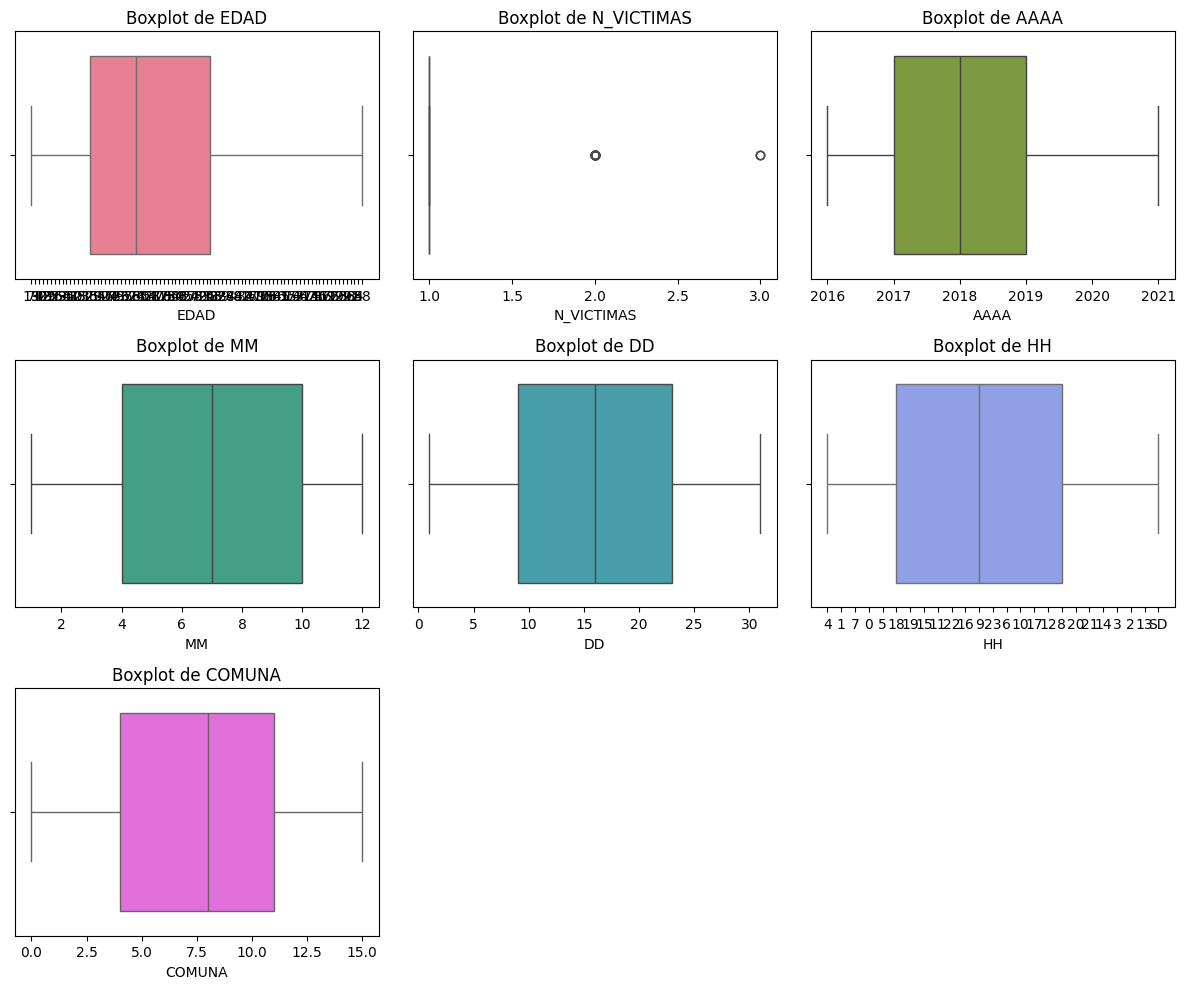

In [16]:
# Crear un boxplot para cada variable
variables = ['EDAD', 'N_VICTIMAS', 'AAAA', 'MM', 'DD', 'HH', 'COMUNA']
colors = sns.color_palette("husl", len(variables))  # Generar una paleta de colores

# Configuración de gráficos para que se vean bien
plt.figure(figsize=(12, 10))

# Iterar sobre las variables y crear un boxplot para cada una con un color diferente
for i, (variable, color) in enumerate(zip(variables, colors), 1):
    plt.subplot(3, 3, i)  # Crear una cuadrícula de subgráficos 3x3
    sns.boxplot(x=df_viales[variable], color=color)
    plt.title(f'Boxplot de {variable}')

plt.tight_layout()
plt.show()

    Interesante los resultados obtenidos:

        - En edad podemos apreciar que en el rango de edades la mayor cantidad de accidentes se da en jóvenes y aunque no se distingue en el gráfico cuál sería esta edad la tendencia es visible.

        - En número de victimas el gráfico nos presenta un gráfico en el cual las victimas son siempre 1, salvo dos casos en todo el dataset, 2 para uno y 3 para el otro. Lo que nos dice que el porcentaje de víctimas fatales es muy bajo ysto se puede deber a varios factores, entre ellos personas que viajan solas o buen uso de los sistemas de seguriadad como cinturón y airbag.

        - En años la representación gráfica es coherente con la información de los datos. Sólo poseeemos datos de los anños 2017, 2018 y 2019.

        - En mes la información también es impactante, la mayor cantidad de los accidentes se da entre el mes 4 y el 10, incluso con media en el mes 7.

        - En el gráfico de los días vemos como los accidentes se distribuyen entre el 9 y el 24 de cada mes en su mayoría. Alentando así la idea de que al final de mes, por ejemplo, lagente no sale tanto por falta de dinero al comienzo del mes por el mismo motivo hasta que reciba su cobro.

        - La representación de las horas nos dan a un primer análisis la idea de que los accidentes se dan principalmente en el horario laboral.

        - En comuna apreciamos que la  8 es la que más accidentes ha registrado, y que obviamente sería la primera que deberíamos investigar por las posibles causas.

****
<span style="color: #FAEF5D">Mapa de Correlacion o Mapa de Calor:</span>

Un mapa de correlación de calor, también conocido como mapa de calor de correlación, es una herramienta visual que muestra la correlación entre diferentes variables en un conjunto de datos utilizando colores para representar el grado de correlación.

En un mapa de calor de correlación, cada celda representa la correlación entre dos variables. El valor de la correlación se indica mediante colores, donde tonos más claros (por ejemplo, tonos de amarillo o blanco) indican una correlación positiva y tonos más oscuros (por ejemplo, tonos de azul o negro) indican una correlación negativa. El color más neutro (generalmente verde) puede representar una correlación cercana a cero o sin correlación.

En nuestro análisis podríamos asociar a las variables medidas de los accidentes viales. Este quedaría de esta forma:

EDAD          object
N_VICTIMAS     int64
AAAA           int64
MM             int64
DD             int64
HH            object
COMUNA         int64
POS_X         object
POS_Y         object
dtype: object
EDAD          float64
N_VICTIMAS      int64
AAAA            int64
MM              int64
DD              int64
HH            float64
COMUNA          int64
POS_X         float64
POS_Y         float64
dtype: object


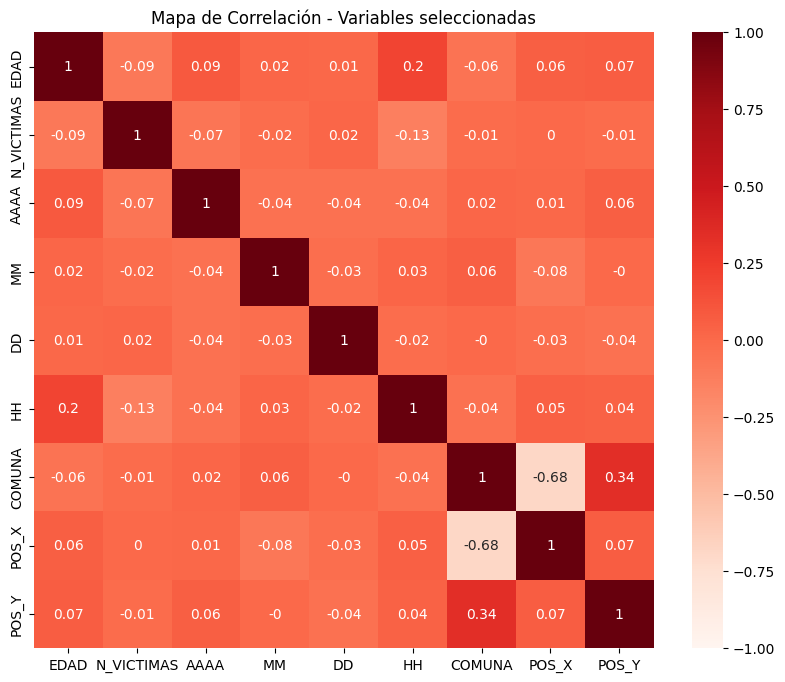

In [17]:
# Seleccionar las columnas específicas
columns_of_interest = ['EDAD', 'N_VICTIMAS', 'AAAA', 'MM', 'DD', 'HH', 'COMUNA', 'POS_X', 'POS_Y']
data_selected = df_viales[columns_of_interest]

# Verificar tipos de datos
print(data_selected.dtypes)

# Convertir columnas a numéricas si es posible
data_selected = data_selected.apply(pd.to_numeric, errors='coerce')

# Verificar nuevamente después de la conversión
print(data_selected.dtypes)

# Calcular la matriz de correlación y redondear a 2 decimales
corr = data_selected.corr().round(2)

# Generar el mapa de calor
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(corr, cmap="Reds", annot=True, vmin=-1, vmax=1, center=0)
plt.title('Mapa de Correlación - Variables seleccionadas')
plt.show()

    En el mapa de calor se pueden apreciar fuertes correlaciones entre las variables. Por ejemplo, las variables EDAD, AAAA, MM, DD, y HH poseen alta correlación con N_VICTIMAS, del mismo modo que N_VICTIMAS posee debil correlación con COMUNA  y con los puntos de posición X e Y. En un sentido estricto estaríamos alegando según estos datos que de manera premeditada con sólo saber la EDAD de la víctima también podríamos saber en qué lugar se dió el accidente y a que hora, por ejemplo.

****
<span style="color: #FAEF5D">Análisis de la Variable de Interés: N_VICTIMAS:</span>

<span style="color: #DC5F00; font-size: 30px; text-decoration: underline;">Histograma de Frecuencias:</span>

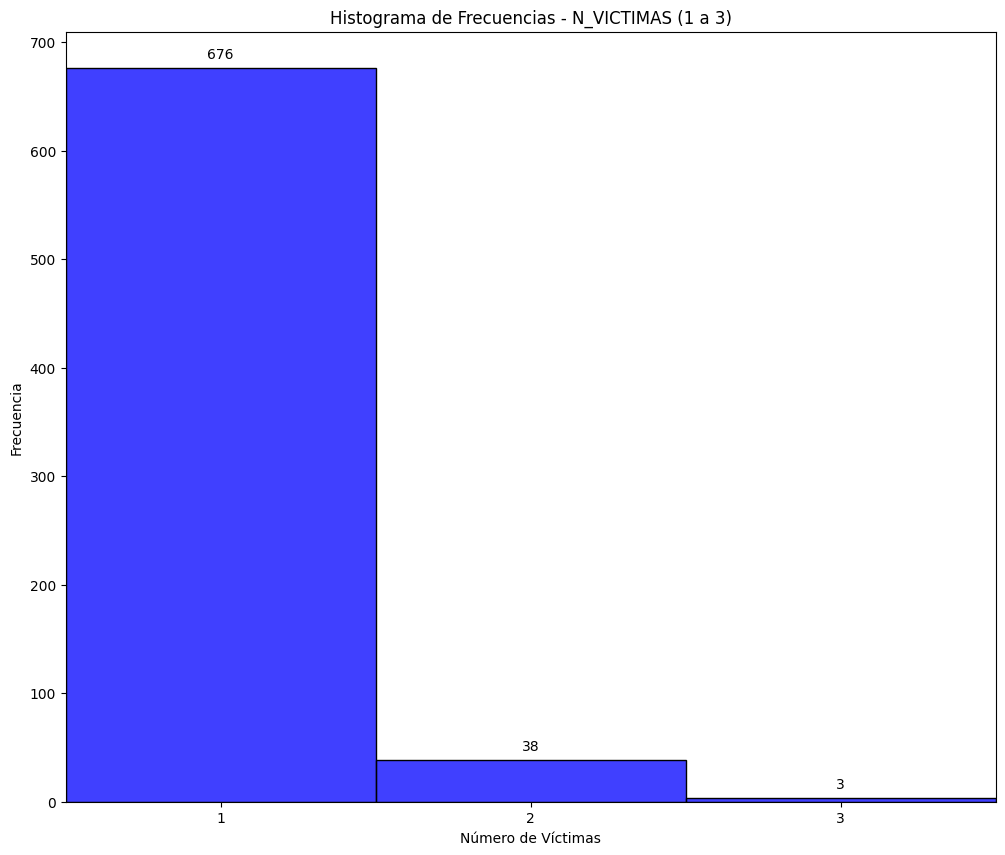

In [18]:
# Crear el histograma de frecuencias para la variable N_VICTIMAS
plt.figure(figsize=(12, 10))
hist = sns.histplot(df_viales['N_VICTIMAS'], bins=[0.5, 1.5, 2.5, 3.5], kde=False, color='blue', discrete=True)
plt.title('Histograma de Frecuencias - N_VICTIMAS (1 a 3)')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.xticks([1, 2, 3])  # Mostrar solo los enteros del 1 al 3 en el eje x
plt.xlim(0.5, 3.5)  # Limitar el rango del eje x para que se enfoquen en 1 a 3

# Agregar anotaciones de frecuencia en cada barra
for p in hist.patches:
    height = p.get_height()
    hist.annotate(f'{int(height)}', 
                  xy=(p.get_x() + p.get_width() / 2, height), 
                  xytext=(0, 5),  # 5 points vertical offset
                  textcoords='offset points', 
                  ha='center', va='bottom')

plt.show()

Nota: en el histograma de frecuencias vemos como los casos mayormente tienen una sola víctima, de todos los casos estudiados solo 3 tuvieron 3 víctimas.

<span style="color: #DC5F00; font-size: 30px; text-decoration: underline;">Gráfico de Barras de Víctimas:</span>

C:\Users\londe\AppData\Local\Temp\ipykernel_24372\168986183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victim_counts.index, y=victim_counts.values, palette="viridis")


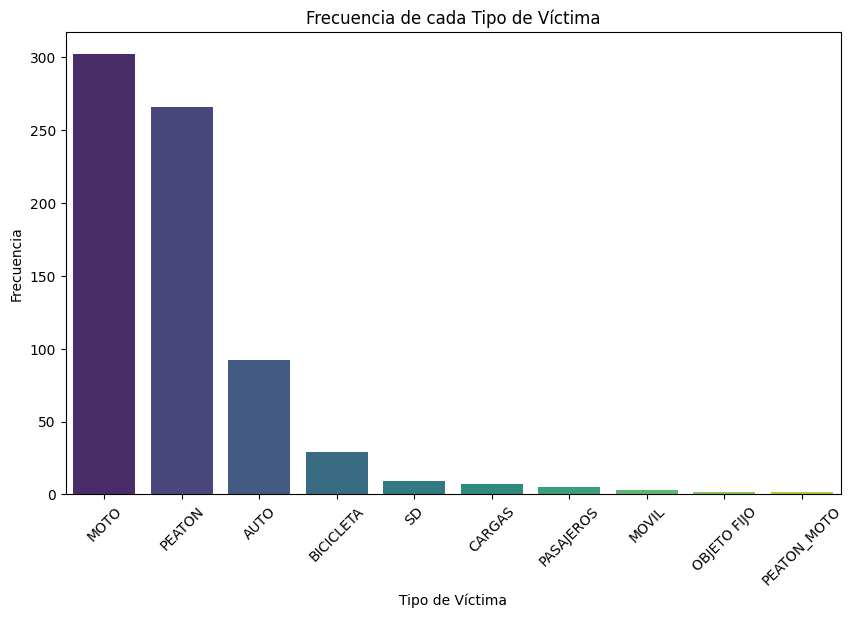

In [19]:
# Contar la frecuencia de cada tipo de víctima
victim_counts = df_viales['VICTIMA'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=victim_counts.index, y=victim_counts.values, palette="viridis")
plt.title('Frecuencia de cada Tipo de Víctima')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.show()

Nota: en este gráfico podemos responder porqué tenemos una sola victima en tantos accidentes, en su mayoría las víctimas son motociclistas y peatones.

<span style="color: #DC5F00; font-size: 30px; text-decoration: underline;">Evolucón Anual de Víctimas:</span>

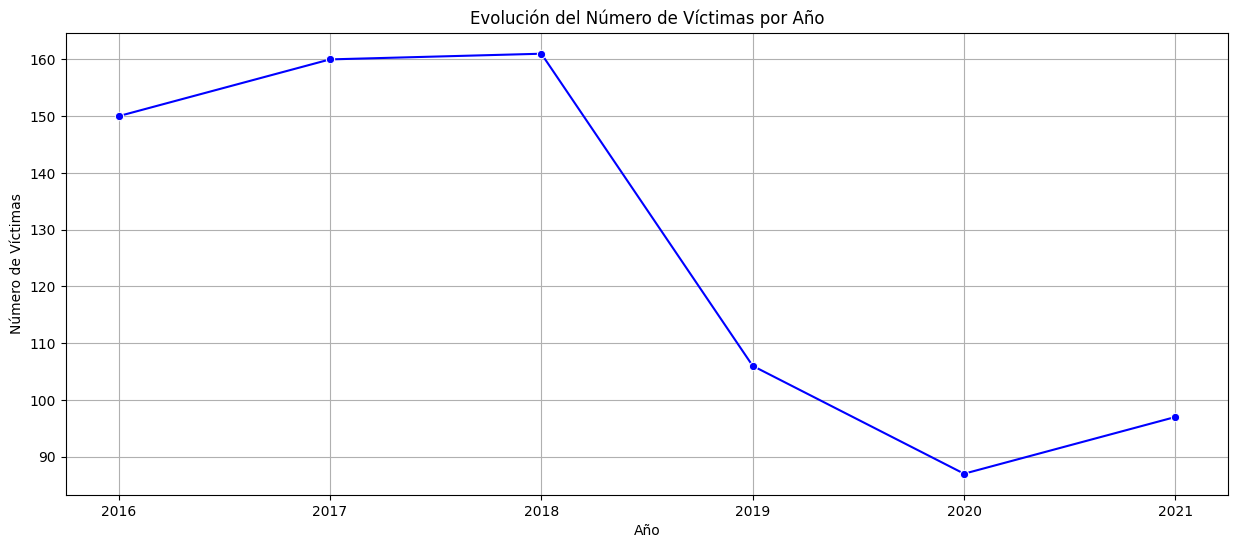

In [20]:
# Agrupar los datos por año y sumar el número de víctimas por año
victimas_por_ano = df_viales.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()

# Crear el gráfico de evolución en el tiempo
plt.figure(figsize=(15, 6))
sns.lineplot(data=victimas_por_ano, x='AAAA', y='N_VICTIMAS', marker='o', color='blue')
plt.title('Evolución del Número de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.grid(True)
plt.show()

Nota: en la serie de datos que nos fué brindada desde 2016 hasta 2021 vemos un incremento en víctimas de accidentes de transeto leve pero continuo desde 2016 hasta 2018 y luego el número de víctimas desciende fuertemente. La causa principal del desenso puede ser la pandemioa por COVID pero eso solo explicaria la disminucion en 2020 y en 2021, en cambio en 2019 no es explicado por eso y por lo tanto debe estar explicada por alguna otra como:

- Implementación de políticas de seguridad vial.

- Cambios en los hábitos de movilidad.

- Mayor conciencia ciudadana.

<span style="color: #DC5F00; font-size: 30px; text-decoration: underline;">Evolucón Mensual Promedio de Víctimas:</span>

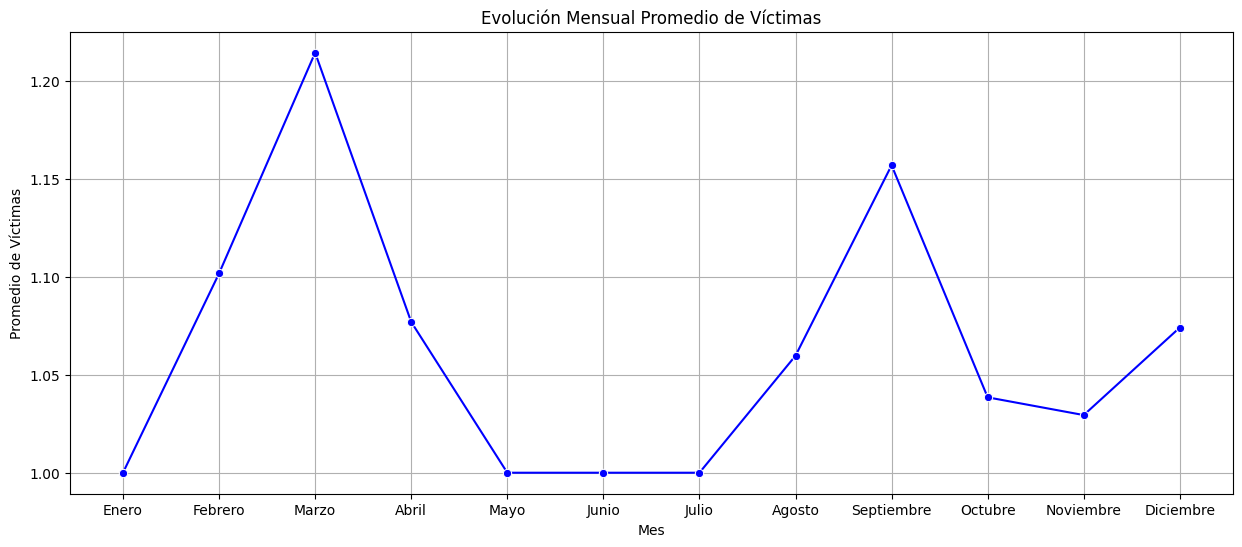

In [21]:
# Agrupar los datos por mes y calcular el promedio de víctimas por mes
victimas_por_mes = df_viales.groupby('MM')['N_VICTIMAS'].mean().reset_index()

# Crear el gráfico de evolución mensual promedio
plt.figure(figsize=(15, 6))
sns.lineplot(data=victimas_por_mes, x='MM', y='N_VICTIMAS', marker='o', color='blue')
plt.title('Evolución Mensual Promedio de Víctimas')
plt.xlabel('Mes')
plt.ylabel('Promedio de Víctimas')
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.show()

Nota: la evolucíon del número de víctimas en promedio a traves de los meses de la serie anual aportada nos muestra los meses en los cuales hay mayor cantidad de accidentes, claramente febrero, marzo y abril son meses de vacaciones y entonces tenemos mayora trafico de personas tanto para trabajar como haciendo turismo, ahora veremos en el análisis de las horas para ver si es en horario laboral o de paseo.

<span style="color: #DC5F00; font-size: 30px; text-decoration: underline;">Evolucón Promedio de Víctimas por Hora del día:</span>

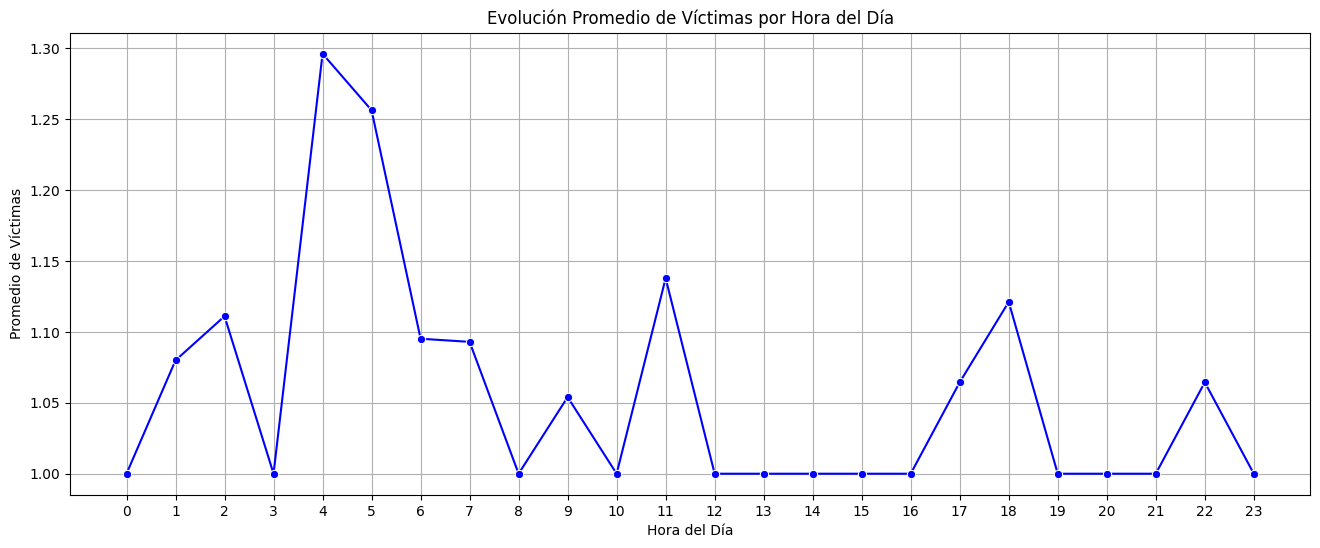

In [22]:
# Filtrar las filas con valores no válidos en la columna "HH"
df_viales = df_viales[df_viales['HH'].str.isdigit()]

# Convertir la columna "HH" a tipo numérico y ordenarla
df_viales['HH'] = pd.to_numeric(df_viales['HH'])
victimas_por_hora = df_viales.groupby('HH')['N_VICTIMAS'].mean().reset_index()

# Crear el gráfico de evolución por hora del día
plt.figure(figsize=(16, 6))
sns.lineplot(data=victimas_por_hora, x='HH', y='N_VICTIMAS', marker='o', color='blue')
plt.title('Evolución Promedio de Víctimas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Víctimas')
plt.grid(True)
plt.xticks(range(24))  # Mostrar todas las horas del día de 0 a 23
plt.show()

Nota: Este gráfico nos muestra 3 picos principales, uno a las 4 donde podemos interpretar que las personas pueden estar saliendo para un trabajo lejano o volviendo de alguna actividad nocturna y como asociamos actividades nocturnas con consumo de alcohol este puede ser una de las causas de la alta cantidad de siniestros vialea a esta hora. El del las 11 casi seguramente se debe a la vuelta del trabajo, así como el de las 18.

<span style="color: #DC5F00; font-size: 30px; text-decoration: underline;">Evolución Promedio por Día del Mes de Víctimas:</span>

C:\Users\londe\AppData\Local\Temp\ipykernel_24372\1777759460.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frecuencia_por_dia, x='Dia', y='Frecuencia', palette='viridis')


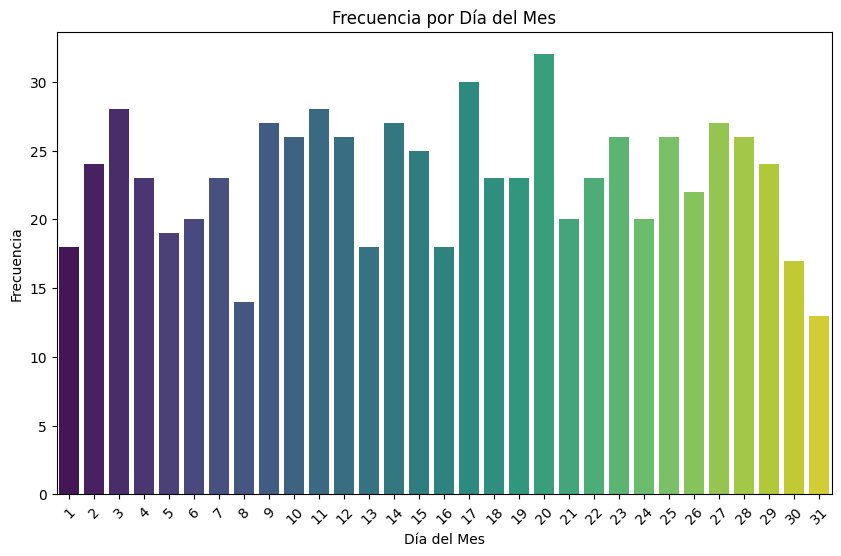

In [23]:
# Calcular la frecuencia de ocurrencia de cada día del mes
frecuencia_por_dia = df_viales['DD'].value_counts().reset_index()
frecuencia_por_dia.columns = ['Dia', 'Frecuencia']

# Ordenar los días del mes en orden numérico
frecuencia_por_dia = frecuencia_por_dia.sort_values('Dia')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=frecuencia_por_dia, x='Dia', y='Frecuencia', palette='viridis')
plt.title('Frecuencia por Día del Mes')
plt.xlabel('Día del Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.show()

Nota: a la hora de analizar este gráfico noenconttramos patrones de comportamiento en el mismo. Probaremos analizar por cuartiles.

#### Frecuencia Promedio por Cuartil de 7 Días

C:\Users\londe\AppData\Local\Temp\ipykernel_24372\3879276718.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencia_promedio_cuartil = frecuencia_por_dia.groupby('Cuartil')['Frecuencia'].mean().reset_index()
C:\Users\londe\AppData\Local\Temp\ipykernel_24372\3879276718.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frecuencia_promedio_cuartil, x='Cuartil', y='Frecuencia', palette='viridis')


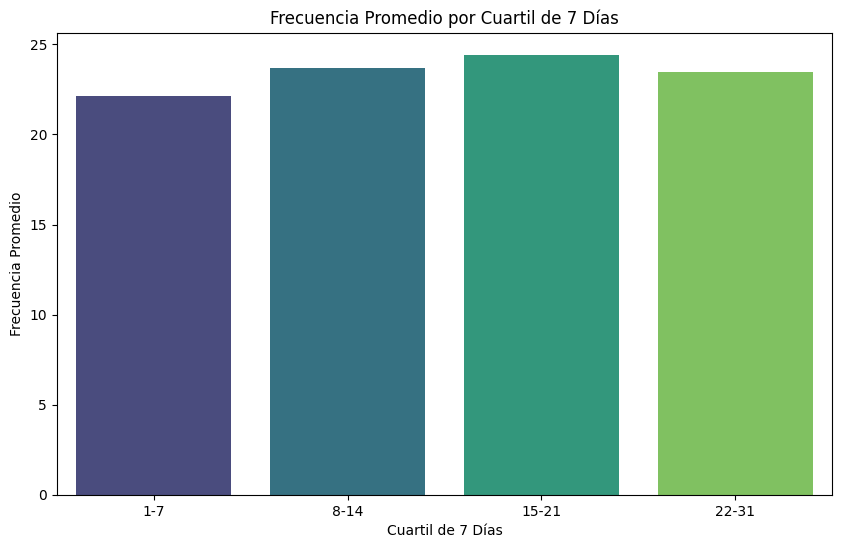

In [24]:
# Calcular la frecuencia de ocurrencia de cada día del mes
frecuencia_por_dia = df_viales['DD'].value_counts().reset_index()
frecuencia_por_dia.columns = ['Dia', 'Frecuencia']

# Ordenar los días del mes en orden numérico
frecuencia_por_dia = frecuencia_por_dia.sort_values('Dia')

# Dividir los datos en cuartiles de 7 días
bins = [1, 8, 15, 22, 31]  # Los cuartiles serán del 1-7, 8-14, 15-21, 22-31
labels = ['1-7', '8-14', '15-21', '22-31']
frecuencia_por_dia['Cuartil'] = pd.cut(frecuencia_por_dia['Dia'], bins=bins, labels=labels, right=False)

# Calcular la frecuencia promedio por cuartil
frecuencia_promedio_cuartil = frecuencia_por_dia.groupby('Cuartil')['Frecuencia'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=frecuencia_promedio_cuartil, x='Cuartil', y='Frecuencia', palette='viridis')
plt.title('Frecuencia Promedio por Cuartil de 7 Días')
plt.xlabel('Cuartil de 7 Días')
plt.ylabel('Frecuencia Promedio')
plt.show()

Nota: como era de esperarse no encontramos un patrón de comportamiento en la información que nos permita hacer conjeturas. Muy levemente aumentan los siniestros hacia final de mes, pero la tendencia es muy debil.

<span style="color: #DC5F00; font-size: 30px; text-decoration: underline;">Promedio Edad de Víctimas:</span>

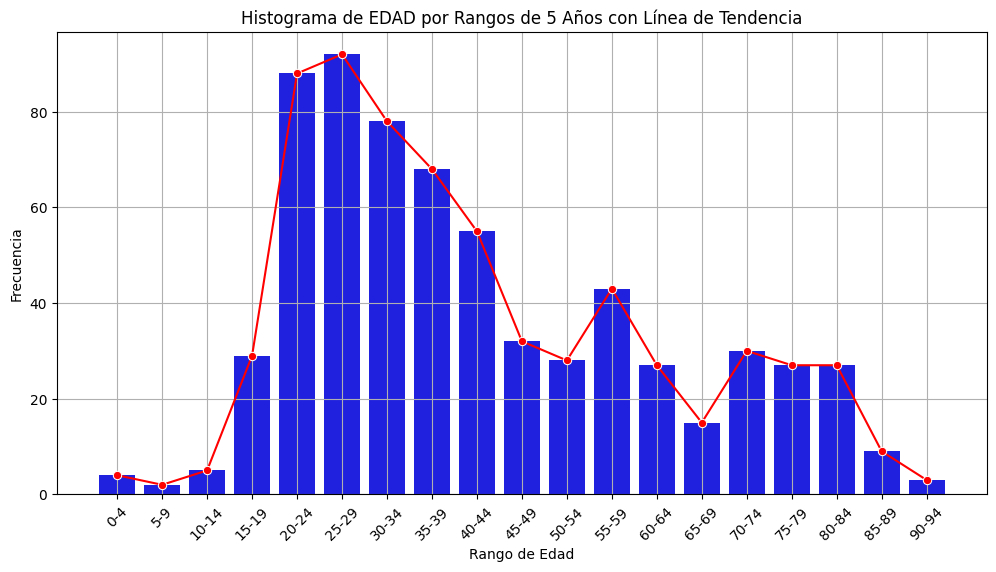

In [25]:
# Convertir la columna EDAD a valores numéricos, ignorando los errores
df_viales['EDAD'] = pd.to_numeric(df_viales['EDAD'], errors='coerce')

# Eliminar filas con valores NaN en la columna EDAD
df_viales = df_viales.dropna(subset=['EDAD'])

# Crear rangos de edades en intervalos de 5 años
bins = list(range(0, int(df_viales['EDAD'].max() + 5), 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df_viales['Rango_Edad'] = pd.cut(df_viales['EDAD'], bins=bins, labels=labels, right=False)

# Crear un DataFrame con las frecuencias por rango de edad
frecuencia_por_rango = df_viales['Rango_Edad'].value_counts().sort_index().reset_index()
frecuencia_por_rango.columns = ['Rango_Edad', 'Frecuencia']

# Crear el gráfico de barras con la línea de tendencia
plt.figure(figsize=(12, 6))
sns.barplot(data=frecuencia_por_rango, x='Rango_Edad', y='Frecuencia', color='blue')
sns.lineplot(data=frecuencia_por_rango, x='Rango_Edad', y='Frecuencia', marker='o', color='red')
plt.title('Histograma de EDAD por Rangos de 5 Años con Línea de Tendencia')
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Nota: entre los 20 y 44 años es la edad que más víctimas de accidentes se registran. Las edades despues de los 44 son menos afectadas por accidentes. Menores de 20 años son los menos afectados. Podríamos vincular este comportamiento a que los jóvenes por tener menor poder adquisitivo son los que o andan en moto o a pie que justamente son las victimas principales, las personas de mayor edad pueden andar en coche y por tal motivo poseen mas elemntos de seguridad ante accidentes.

<span style="color: #DC5F00; font-size: 30px; text-decoration: underline;">Relación entre Rol y Sexo de la víctima</span>

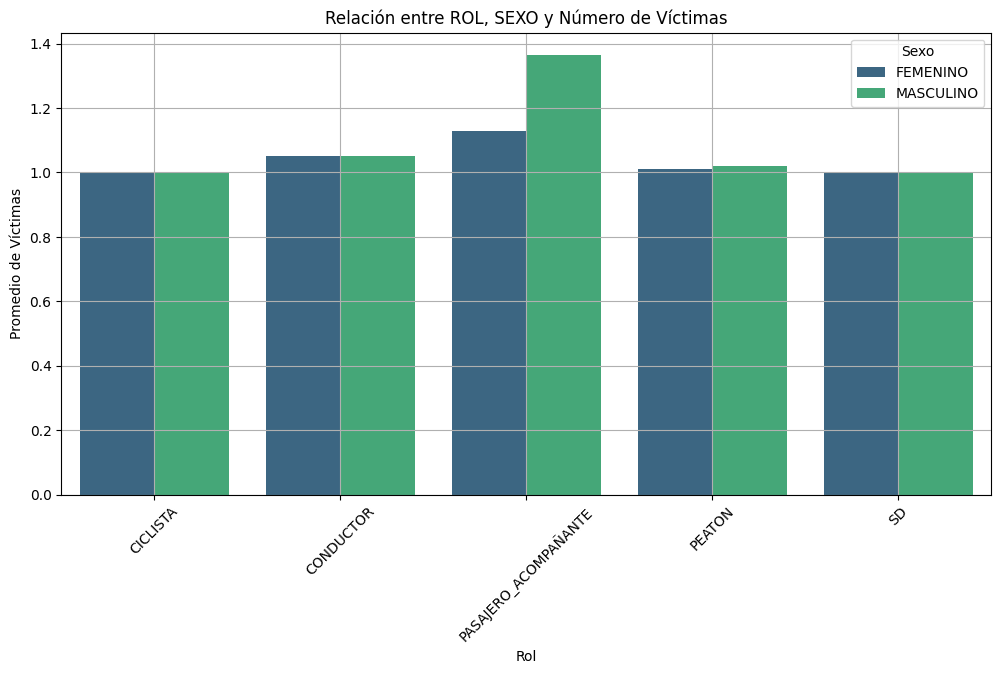

In [26]:
# Agrupar los datos por ROL, SEXO y calcular la media del número de víctimas
data_agrupada = df_viales.groupby(['ROL', 'SEXO'])['N_VICTIMAS'].mean().reset_index()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(data=data_agrupada, x='ROL', y='N_VICTIMAS', hue='SEXO', palette='viridis')
plt.title('Relación entre ROL, SEXO y Número de Víctimas')
plt.xlabel('Rol')
plt.ylabel('Promedio de Víctimas')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Nota: esta relación nos brinda una mirada muy similar entre la afectación por accidentes entre hombres y mujeres. Únicamente como acompañante los hombres son en mayor medida victimas. en todos los demás roles es prácticamente lo mismo.

<span style="color: #DC5F00; font-size: 30px; text-decoration: underline;">Relación entre Rol y Sexo de la víctima</span>

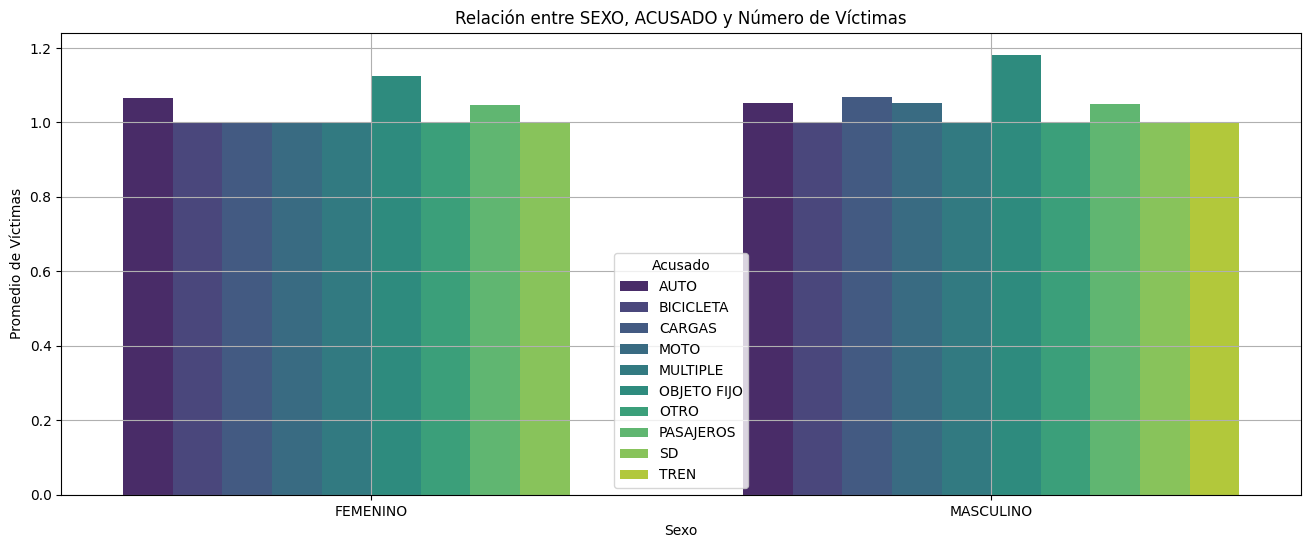

In [27]:
# Agrupar los datos por SEXO, ACUSADO y calcular la media del número de víctimas
data_agrupada = df_viales.groupby(['SEXO', 'ACUSADO'])['N_VICTIMAS'].mean().reset_index()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(16, 6))
sns.barplot(data=data_agrupada, x='SEXO', y='N_VICTIMAS', hue='ACUSADO', palette='viridis')
plt.title('Relación entre SEXO, ACUSADO y Número de Víctimas')
plt.xlabel('Sexo')
plt.ylabel('Promedio de Víctimas')
plt.legend(title='Acusado')
plt.grid(True)
plt.show()

Nota: en un sentido general los que más generan accidentes son los hombres.

<span style="color: #DC5F00; font-size: 30px; text-decoration: underline;">Frecuencia según el sexo tanto para ROL como para ACUSADO </span>

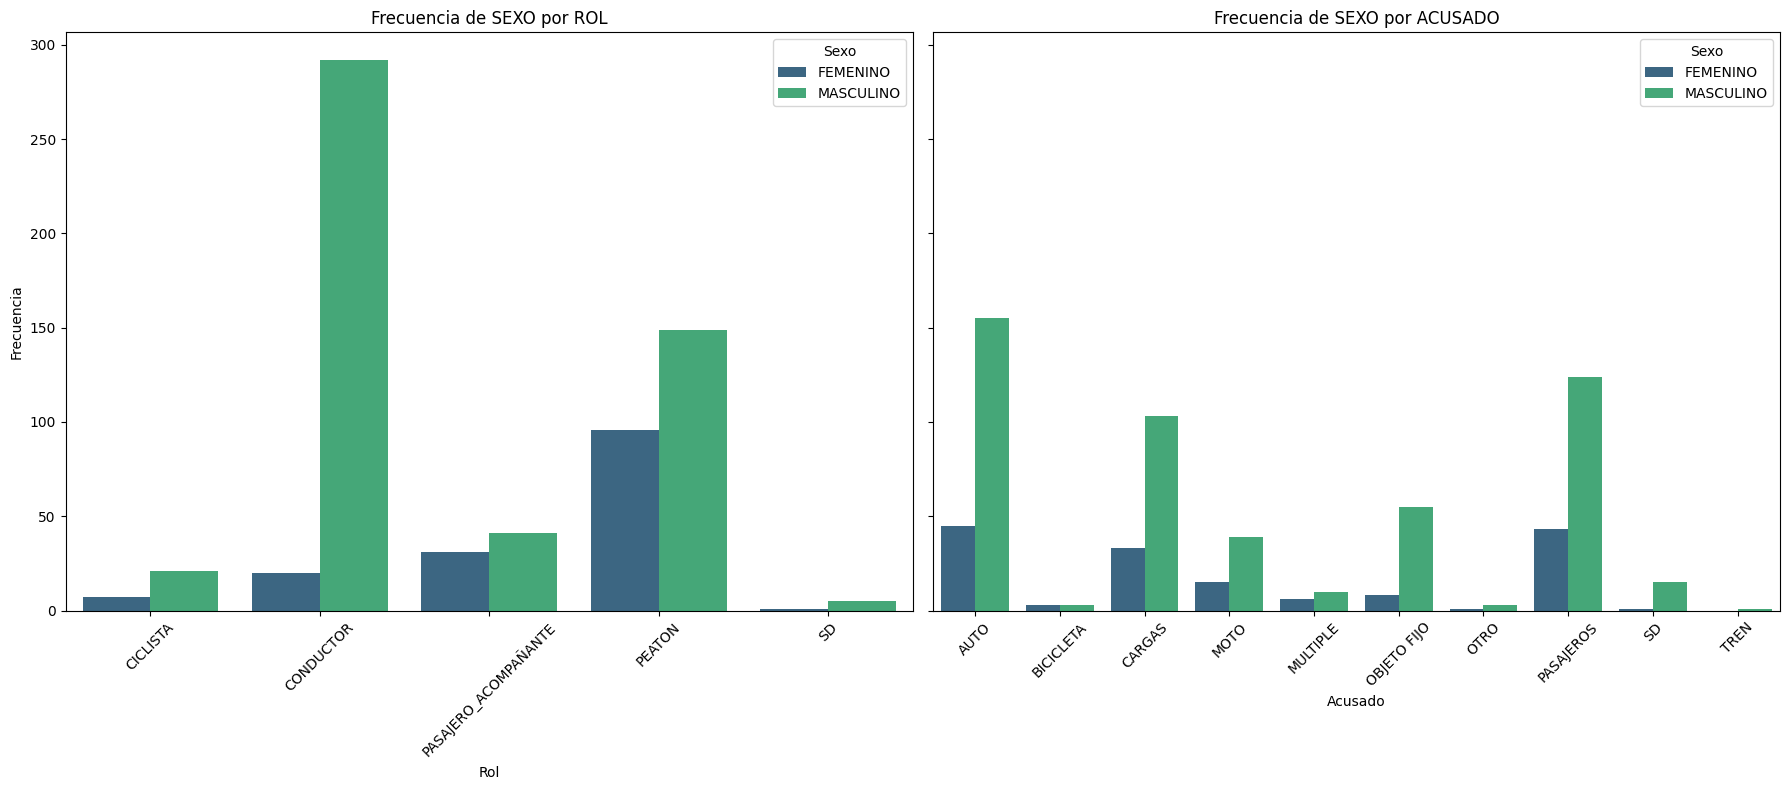

In [28]:
# Calcular las frecuencias de SEXO por ROL
frecuencia_sexo_rol = df_viales.groupby(['ROL', 'SEXO']).size().reset_index(name='Frecuencia')

# Calcular las frecuencias de SEXO por ACUSADO
frecuencia_sexo_acusado = df_viales.groupby(['ACUSADO', 'SEXO']).size().reset_index(name='Frecuencia')

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Gráfico de barras para ROL
sns.barplot(data=frecuencia_sexo_rol, x='ROL', y='Frecuencia', hue='SEXO', ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia de SEXO por ROL')
axes[0].set_xlabel('Rol')
axes[0].set_ylabel('Frecuencia')
axes[0].legend(title='Sexo')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para ACUSADO
sns.barplot(data=frecuencia_sexo_acusado, x='ACUSADO', y='Frecuencia', hue='SEXO', ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia de SEXO por ACUSADO')
axes[1].set_xlabel('Acusado')
axes[1].set_ylabel('Frecuencia')
axes[1].legend(title='Sexo')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Nota: si diagramamos las frecuencias de victimas segun ROL y ACUSADO para los dos sexos podemos apreciar que en casi todos los casos (todos en los mas relevantes) los hombres son mayormente acusados como también víctimas.

<span style="color: #DC5F00; font-size: 30px; text-decoration: underline;">Frecuencia según el sexo tanto para ROL como para ACUSADO </span>

C:\Users\londe\AppData\Local\Temp\ipykernel_24372\2510005446.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencia_sexo_edad = df_viales.groupby(['Rango_Edad', 'SEXO']).size().reset_index(name='Frecuencia')


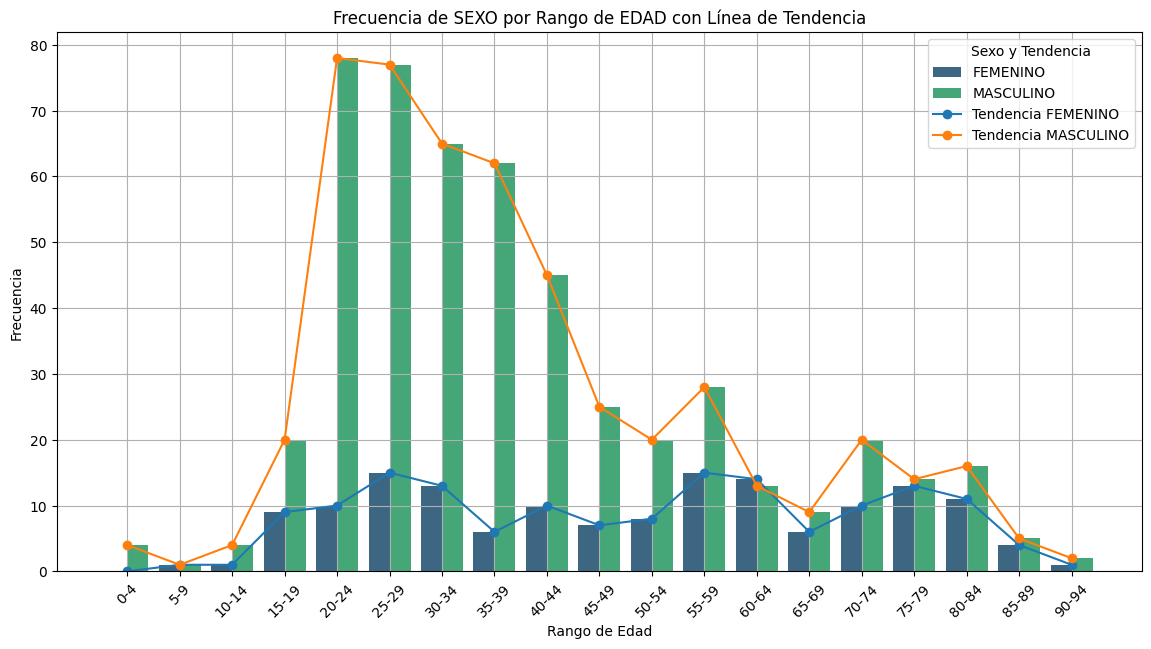

In [29]:
# Convertir la columna EDAD a valores numéricos, ignorando los errores
df_viales['EDAD'] = pd.to_numeric(df_viales['EDAD'], errors='coerce')

# Eliminar filas con valores NaN en la columna EDAD
df_viales = df_viales.dropna(subset=['EDAD'])

# Crear rangos de edades en intervalos de 5 años
bins = list(range(0, int(df_viales['EDAD'].max() + 5), 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df_viales['Rango_Edad'] = pd.cut(df_viales['EDAD'], bins=bins, labels=labels, right=False)

# Calcular las frecuencias por Rango de Edad y SEXO
frecuencia_sexo_edad = df_viales.groupby(['Rango_Edad', 'SEXO']).size().reset_index(name='Frecuencia')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(14, 7))
sns.barplot(data=frecuencia_sexo_edad, x='Rango_Edad', y='Frecuencia', hue='SEXO', palette='viridis')

# Añadir la línea de tendencia
for sexo in frecuencia_sexo_edad['SEXO'].unique():
    subset = frecuencia_sexo_edad[frecuencia_sexo_edad['SEXO'] == sexo]
    plt.plot(subset['Rango_Edad'], subset['Frecuencia'], marker='o', label=f'Tendencia {sexo}')

plt.title('Frecuencia de SEXO por Rango de EDAD con Línea de Tendencia')
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo y Tendencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Nota: la verdad que esta relación entre el sexo y la edad no guardan relacion o tendencia significaiva para explicar los siniestros.

****
<span style="color: #FAEF5D">Mapa de Distribución espacial de Siniestros</span>

In [30]:
# Filtrar filas con posiciones no válidas
valid_positions = ~(df_viales['POS_X'].str.contains('[^0-9.,-]') | df_viales['POS_Y'].str.contains('[^0-9.,-]') | (df_viales['POS_X'] == '.') | (df_viales['POS_Y'] == '.'))

# Establecer posiciones no válidas en NaN
df_viales.loc[~valid_positions, ['POS_X', 'POS_Y']] = np.nan

# Convertir las cadenas a tipo numérico (float)
df_viales['POS_X'] = df_viales['POS_X'].str.replace(',', '.').astype(float)
df_viales['POS_Y'] = df_viales['POS_Y'].str.replace(',', '.').astype(float)

c:\Users\londe\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

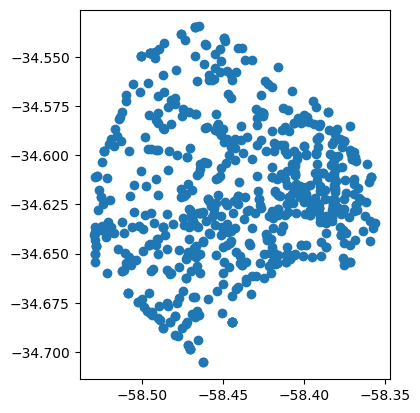

In [31]:
# Iniciamos CRS
crs={'init':'epsg:4326'}
#Definimos la geometría según nuestro dataset
geometry=[Point(xy) for xy in zip(df_viales["POS_X"], df_viales["POS_Y"])]

#Ua vez que tenemos el sistema de referencia decoordenadas y la geometría; se procede a la carga de los datos
geodata=gpd.GeoDataFrame(df_viales,crs=crs, geometry=geometry)

#Se imprime el resultante que luego será introducido en un mapa
geodata.plot()

Una vez que el mapa de geometría está listo, se debe cargar el archivo de las comunas del la ciudad de Buenos Aires que se extrajo de https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource que debe ser un archivo Shapefile (SHP)

In [32]:
import requests
import zipfile
import geopandas as gpd
import os

# URL del archivo ZIP
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/comunas/comunas.zip"

# Nombre del archivo ZIP descargado
zip_file = "comunas.zip"

# Carpeta de destino para extraer el archivo ZIP
extract_folder = "comunas_shapefile"

# Descargar el archivo ZIP desde la URL
response = requests.get(url)

# Guardar el archivo ZIP descargado en el disco
with open(zip_file, "wb") as f:
    f.write(response.content)

# Extraer el contenido del archivo ZIP
with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(extract_folder)

# Leer el archivo shapefile extraído
shapefile = gpd.read_file("comunas_shapefile/comunas_wgs84.shp")

# Mostrar información del shapefile
print(shapefile.head())


   ID          OBJETO  COMUNAS  \
0   1  LIMITE COMUNAL      2.0   
1   3  LIMITE COMUNAL      6.0   
2   6  LIMITE COMUNAL     10.0   
3   7  LIMITE COMUNAL     11.0   
4   8  LIMITE COMUNAL     12.0   

                                             BARRIOS     PERIMETRO  \
0                                           RECOLETA  21452.838648   
1                                          CABALLITO  10990.964471   
2  FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...  18332.037457   
3  VILLA DEL PARQUE - VILLA  DEVOTO - VILLA GRAL....  19987.696155   
4  COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...  17232.189372   

           AREA                                           geometry  
0  6.317265e+06  POLYGON ((-58.38000 -34.57002, -58.38002 -34.5...  
1  6.851029e+06  POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...  
2  1.265656e+07  POLYGON ((-58.48834 -34.62016, -58.48820 -34.6...  
3  1.412004e+07  POLYGON ((-58.49838 -34.59637, -58.49718 -34.5...  
4  1.557093e+07  POLYGON ((-5

Text(158.98305973900304, 0.5, 'Latitud')

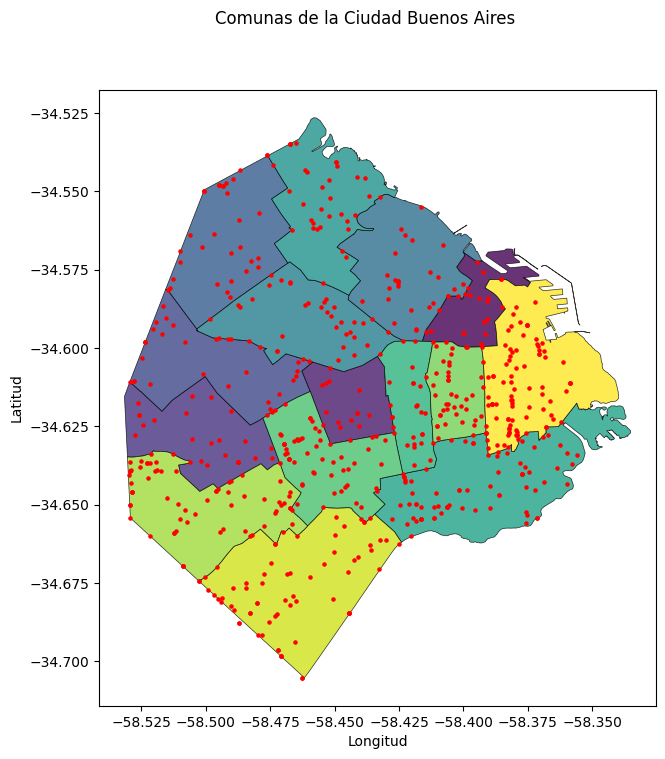

In [33]:
#Se realiza sobre el mapa de CABA la presentación de los puntos de referencia a los siniestros viales

#Crea ejes y figuras
fig, ax = plt.subplots(figsize=(10,8))

#Dibujar el Shapefile
shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=0.8,linewidth=0.5,cmap="viridis")

#Dibujar los datos geoespaciales
geodata.plot(ax=ax, color='red', markersize=5);

#Agregar título y etiquetas de ejes
fig.suptitle('Comunas de la Ciudad Buenos Aires', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')

Nota: en este mapa vemos el mapa de las comunas pintado con los puntos que corresponden a los casos de siniestros viales. En un sentido amplio vemos como se consentran en la zona sur del mapa y principalmente en la zona sureste.